In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn import metrics

In [2]:
df = pd.read_csv('credit_train.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
df.dropna(inplace=True)

In [4]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Loan Status"] = encoder.fit_transform(df["Loan Status"])
df["Term"] = encoder.fit_transform(df["Term"])
df["Home Ownership"] = encoder.fit_transform(df["Home Ownership"])
df["Purpose"] = encoder.fit_transform(df["Purpose"])

In [6]:
print(df["Years in current job"].unique())

['8 years' '< 1 year' '2 years' '3 years' '10+ years' '4 years' '6 years'
 '7 years' '5 years' '1 year' '9 years']


In [7]:
# Replace strings with numeric values
df["Years in current job"] = df["Years in current job"].replace({'< 1 year': '0', '1 year': '1', '2 years': '2', 
                                                                 '3 years': '3', '4 years': '4', '5 years': '5', '6 years': '6', 
                                                                 '7 years': '7', '8 years': '8', '9 years': '9', '10+ years': '10'})


In [8]:
df = df.drop(["Loan ID", "Customer ID"], axis=1)

df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,1,99999999,1,741.0,2231892.0,8,2,3,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,1,217646,1,730.0,1184194.0,0,1,3,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,1,548746,1,678.0,2559110.0,2,3,3,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,1,99999999,1,728.0,714628.0,3,3,3,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,1,99999999,1,740.0,776188.0,0,2,3,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0


<ipython-input-9-165c0ea561ec>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


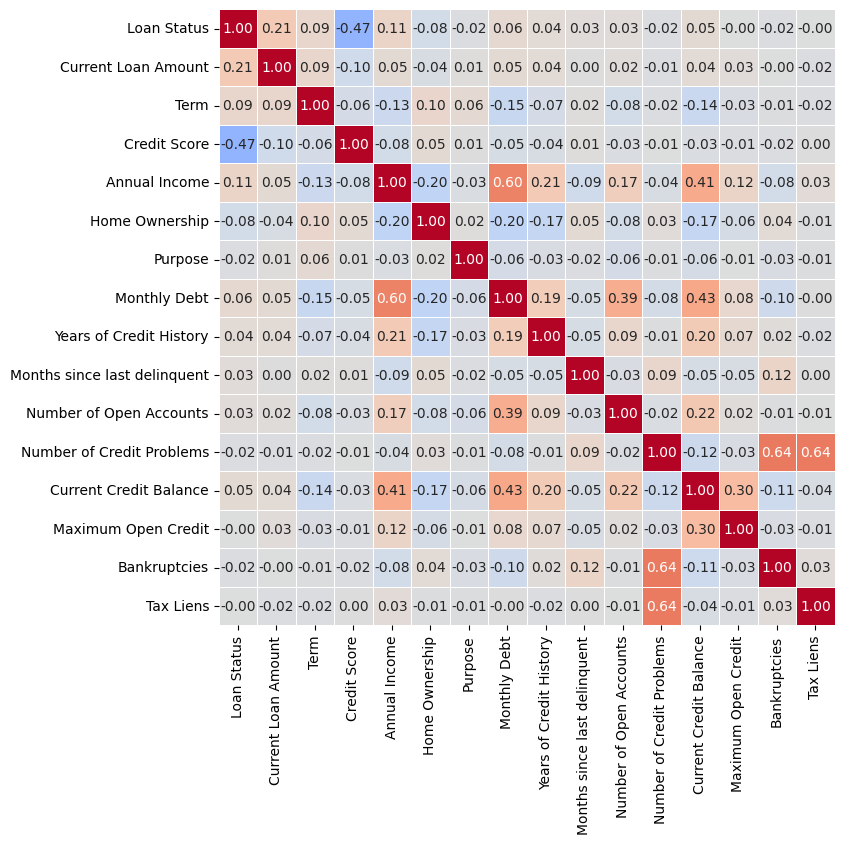

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, linewidths=.5, fmt= '.2f', center=0, cbar=False, square=True)

# Customize font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()

In [36]:
df2=df

In [37]:
# X-independent,Y-dependent
x=df[['Bankruptcies','Tax Liens']]
y=df[['Number of Credit Problems']]

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [39]:
x_train.shape

(1622, 2)

In [40]:
x_test.shape

(406, 2)

In [41]:
y_test.shape

(406, 1)

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [43]:
print(model.coef_)
print(model.intercept_)

[[0.99809789 1.05299819]]
[0.0338293]


In [44]:
y_pred = model.predict(x_test)

In [45]:
# y_pred

In [46]:
from sklearn.metrics import mean_squared_error
# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('rmse:',rmse)
# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)
# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)


rmse: 0.1788445300239294
MAE: 0.06217850350274179
R2 score: 0.8971290920021963


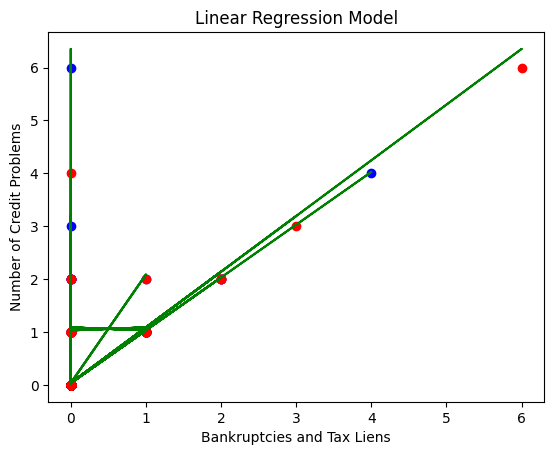

Equation of line: y = 0.03382930252409583 + 0.9980978900275173*Bankruptcies + 1.0529981915239124*Tax Liens


In [47]:
# Plot the actual data points
plt.scatter(x_test['Bankruptcies'], y_test, color='blue')
plt.scatter(x_test['Tax Liens'], y_test, color='red')

# Plot the predicted line
plt.plot(x_test, y_pred, color='green')

# Add axis labels and title
plt.xlabel('Bankruptcies and Tax Liens')
plt.ylabel('Number of Credit Problems')
plt.title('Linear Regression Model')

# Display the plot
plt.show()

# Print the equation of the line
print('Equation of line: y = {} + {}*Bankruptcies + {}*Tax Liens'.format(model.intercept_[0], model.coef_[0][0], model.coef_[0][1]))

In [ ]:
Y_pred=y_pred.ravel()

In [ ]:
Y_pred

array([0.03182963, 0.03182963, 0.03182963, ..., 0.03182963, 0.03182963,
       0.03182963])

In [ ]:
Y_test = y_test['Number of Credit Problems'].values
Y_test

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
Y_test=Y_test.ravel()

In [ ]:
df=pd.DataFrame(Y_test,Y_pred)
df=pd.DataFrame({"Actual Number of Credit Problems":Y_test,'Predicted Number of Credit Problems':Y_pred})
print(df)

      Actual Number of Credit Problems  Predicted Number of Credit Problems
0                                  0.0                              0.03183
1                                  0.0                              0.03183
2                                  0.0                              0.03183
3                                  0.0                              0.03183
4                                  0.0                              0.03183
...                                ...                                  ...
7280                               0.0                              0.03183
7281                               0.0                              0.03183
7282                               0.0                              0.03183
7283                               0.0                              0.03183
7284                               0.0                              0.03183

[7285 rows x 2 columns]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
model.score(x_test,Y_test)*100

81.6879211104802

In [ ]:
trial = np.array([[1184194.0,122170.0]])
print("New Predicted: {}".format(model.predict(trial)))

New Predicted: [[1306004.16370116]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np

class LinearRegression:
    """
    Linear Regression implementation using the normal equation.
    """
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y):
        """
        Train the linear regression model on the input data and targets.
        """
        # Add a column of 1s for the bias term
        X_b = np.c_[np.ones((len(X), 1)), X]
        
        # Calculate the normal equation
        theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        
        self.theta = theta
        
    def predict(self, X):
        """
        Predict the target values for new input data.
        """
        # Add a column of 1s for the bias term
        X_b = np.c_[np.ones((len(X), 1)), X]
        
        # Predict the target values
        y_pred = X_b.dot(self.theta)
        
        return y_pred

# Split the data into features and target
X = df2[['Bankruptcies','Tax Liens']]
y = df2['Number of Credit Problems']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values for the testing set
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)


0.2287997437458122
